In [1]:
!pip install matplotlib

import os
import time
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Name for VBFL share folder
vbflshare = '/content/drive/My Drive/VBFL'

Mounted at /content/drive/


All files found and are not empty. Proceeding with comparison.


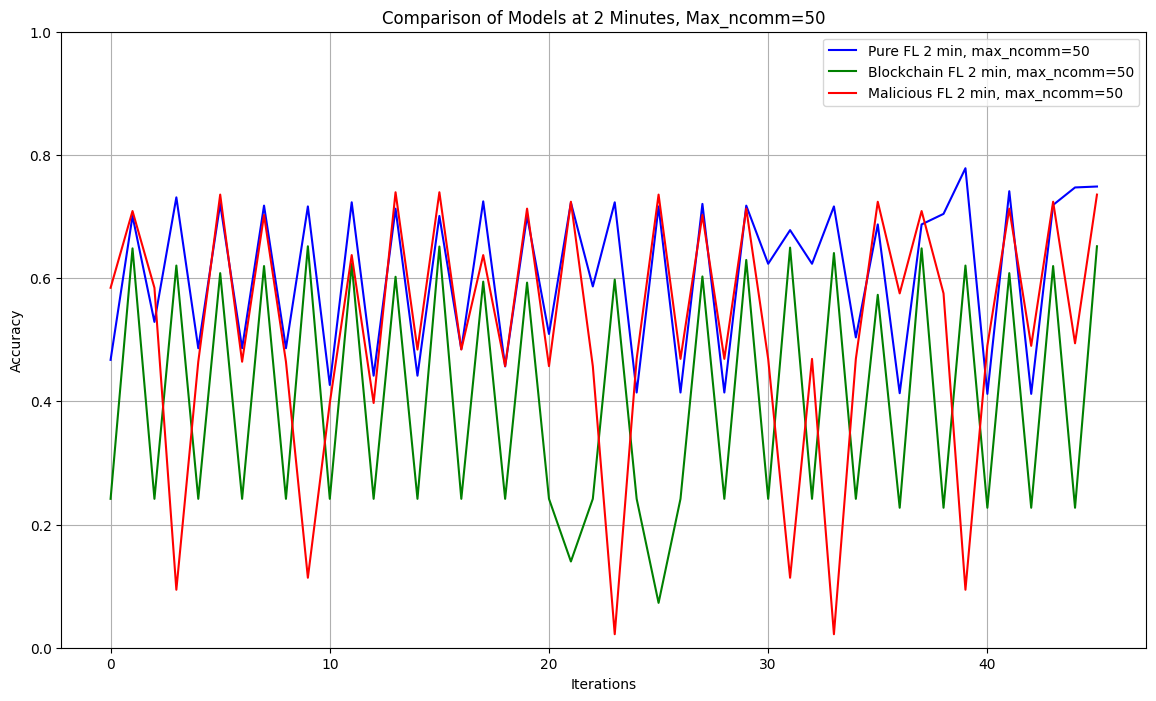

Graph image saved as /content/drive/My Drive/VBFL/Comparison2_max_ncomm50.png
All files found and are not empty. Proceeding with comparison.


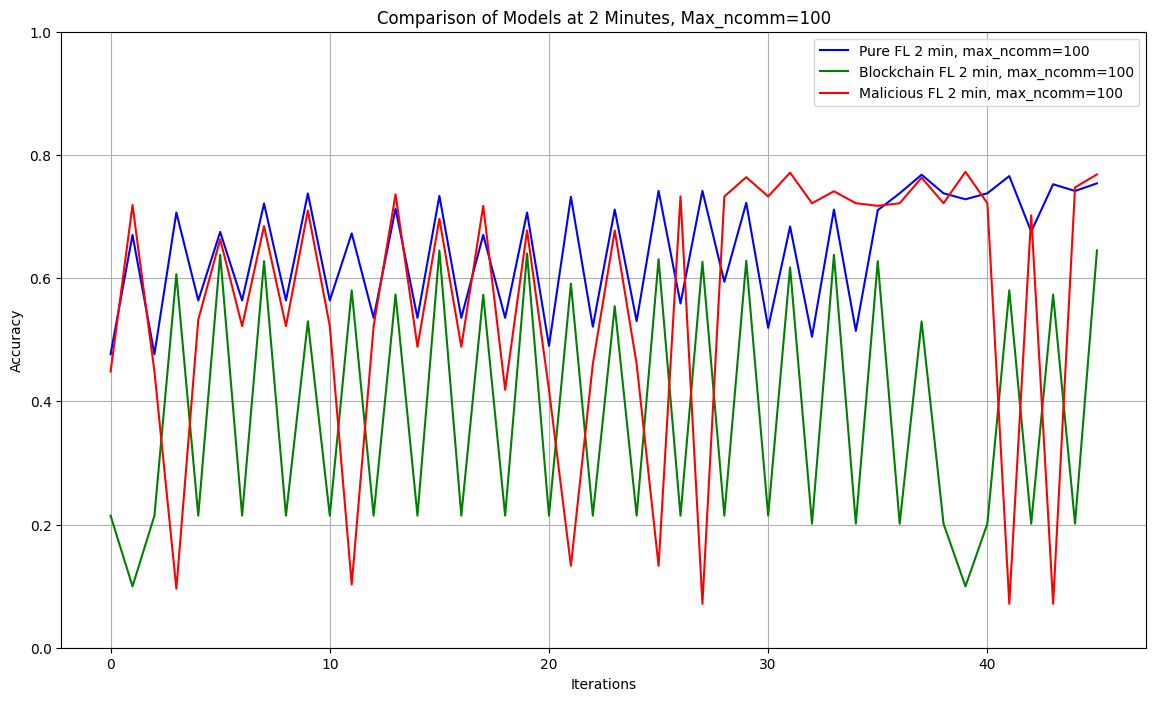

Graph image saved as /content/drive/My Drive/VBFL/Comparison2_max_ncomm100.png
All files found and are not empty. Proceeding with comparison.


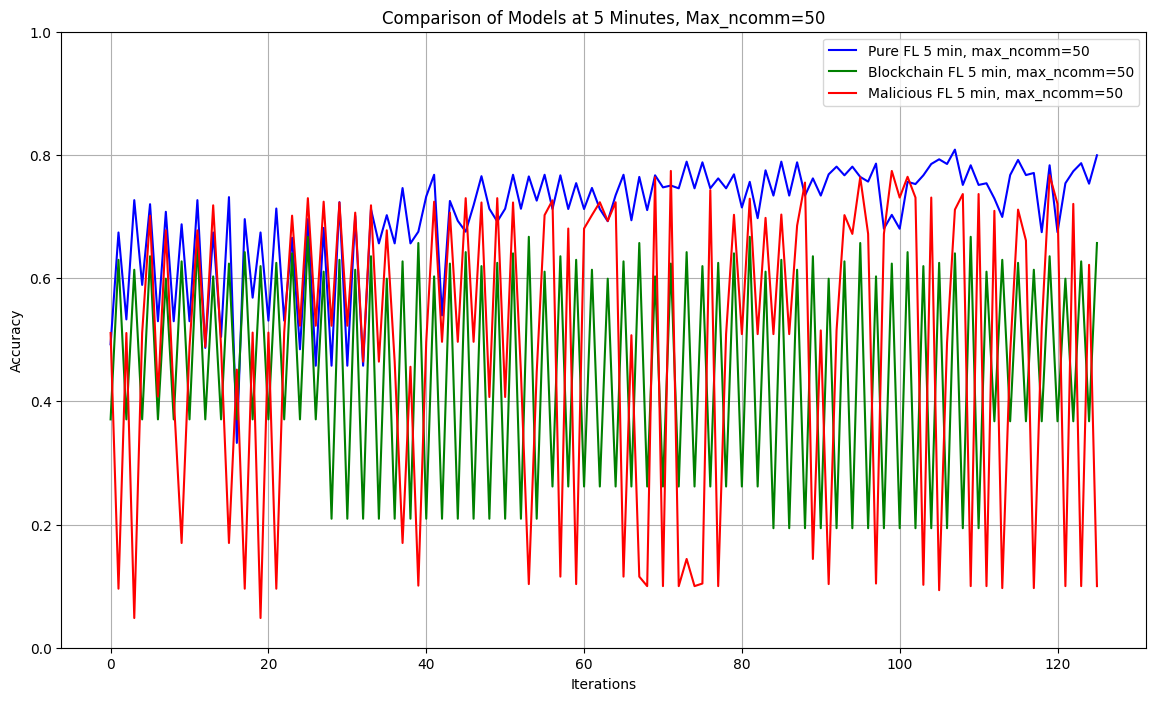

Graph image saved as /content/drive/My Drive/VBFL/Comparison5_max_ncomm50.png
All files found and are not empty. Proceeding with comparison.


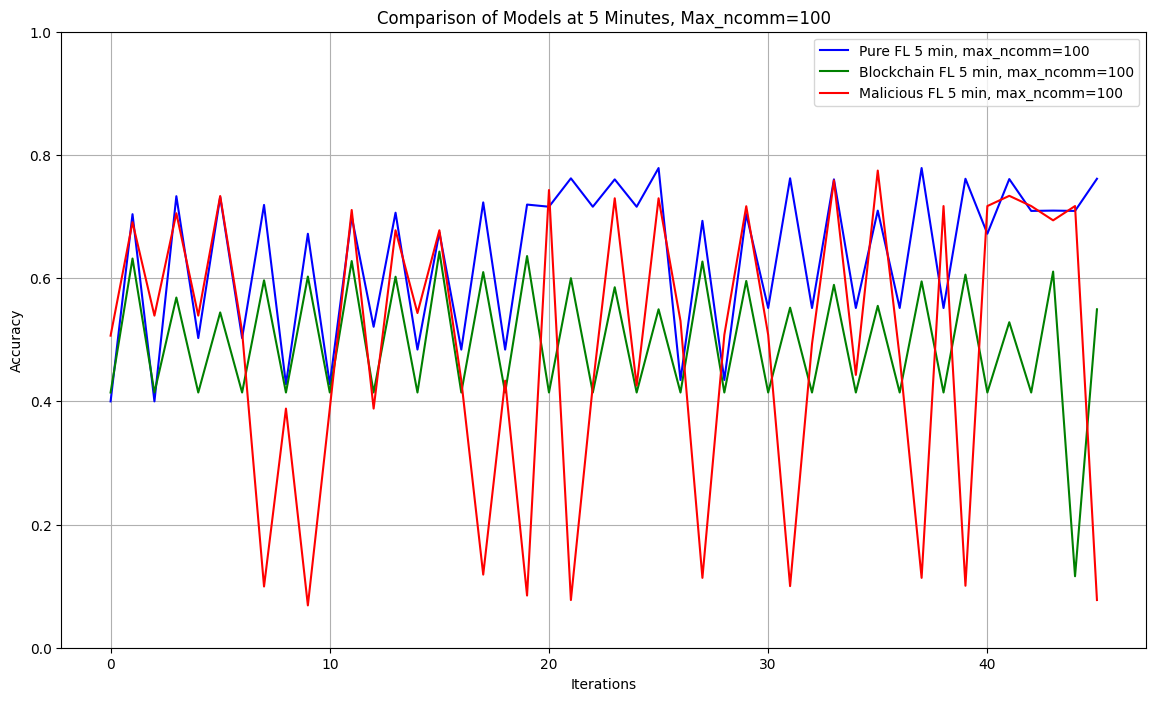

Graph image saved as /content/drive/My Drive/VBFL/Comparison5_max_ncomm100.png


In [12]:
import os
import re
import time
import matplotlib.pyplot as plt

# Define colors for each model
colors = {'Pure': 'blue', 'Blockchain': 'green', 'Malicious': 'red'}

# Define the current parameter to test and its values
current_parameter = 'max_ncomm'  # Replace with 'iid', 'vh', 'pow', 'ha', or 'dtx' as needed
parameter_values = {
    'max_ncomm': ['50', '100'],
    'vh': ['0.05', '0.1'],
    'pow': ['0', '1'],  # '0' for PoS, '1' for PoW
    'ha': ['dynamic', 'fixed'],  # 'dynamic' for *,*,*, 'fixed' for specific numbers
    'dtx': ['0', '1'],  # '0' for Resync On, '1' for Resync Off
    'iid': ['0', '1']  # '0' for Non-IID, '1' for IID
}

# Function to generate file paths dynamically based on the current parameter and value
def generate_file_paths(time_mark, parameter, value):
    param_value = value if parameter != 'ha' else 'dynamic' if value == '*' else 'fixed'
    return {
        model: os.path.join(vbflshare, f"{model}{time_mark}_{parameter}{param_value}.txt")
        for model in colors.keys()
    }

# Function to check for file existence and that they are not empty
def check_files_exist(file_paths):
    actual_files = {file.lower() for file in os.listdir(vbflshare)}
    for file_path in file_paths:
        file_name = os.path.basename(file_path).lower()
        if file_name not in actual_files:
            print(f"File not found: {file_path}")
            return False
        if not os.path.getsize(file_path) > 0:
            print(f"File is empty: {file_path}")
            return False
    return True

# Function to wait for all files to be available and non-empty
def wait_for_files(file_paths):
    while not check_files_exist(file_paths):
        print(f"Waiting for files to be available and non-empty in the shared folder...")
        time.sleep(60)  # Check every 60 seconds
    print("All files found and are not empty. Proceeding with comparison.")

# Function to read data from the output files and extract accuracies
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    accuracies = []
    for line in lines:
        if "model accuracy becomes" in line or "validator updated model accuracy" in line:
            parts = line.split('-')
            if len(parts) == 2:
                try:
                    accuracy = float(parts[1].strip())
                    accuracies.append(accuracy)
                except ValueError as e:
                    print(f"Error parsing line '{line}': {e}")
    return accuracies

# Time marks to compare
time_marks = ['2','5']

def plot_accuracies(file_paths, colors, time_mark, current_parameter, value):
    data = {}
    # Read data from each file and store it
    for model_name, file_path in file_paths.items():
        data[model_name] = read_data(file_path)
    # Find the shortest length of accuracies
    min_length = min(len(acc) for acc in data.values())

    # Plot shortest length iterations for each model
    plt.figure(figsize=(14, 8))
    for model_name, accuracies in data.items():
        label_name = f'{model_name} FL {time_mark} min, {current_parameter}={value}'
        plt.plot(range(min_length), accuracies[:min_length], label=label_name, color=colors[model_name])

    # Define the plot title and labels
    plt.title(f'Comparison of Models at {time_mark} Minutes, {current_parameter.capitalize()}={value}')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    plt.grid(True)

    # Define the name of the graph image file
    graph_image_file = f"Comparison{time_mark}_{current_parameter}{value}.png"
    graph_image_path = os.path.join(vbflshare, graph_image_file)

    # Save the figure to the specified file
    plt.savefig(graph_image_path)

    # Display the plot in the notebook
    plt.show()

    print(f"Graph image saved as {graph_image_path}")

# Usage in the loop
for time_mark in time_marks:
    for value in parameter_values[current_parameter]:
        file_paths = generate_file_paths(time_mark, current_parameter, value)
        wait_for_files(list(file_paths.values()))
        plot_accuracies(file_paths, colors, time_mark, current_parameter, value)